# Decision Trees

Decision Tree algorithm is just like a extended if/else conditions. 

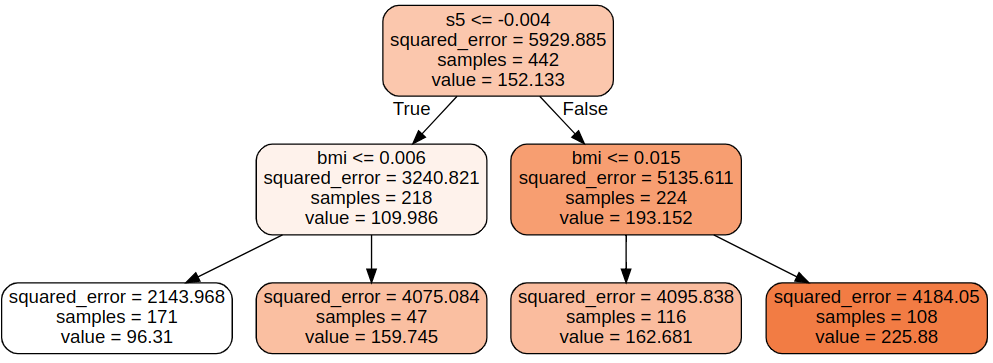

Each node in the tree either represents a question or a terminal node (also called *leaf*)

We can plot the tree with [`plot_tree`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree)

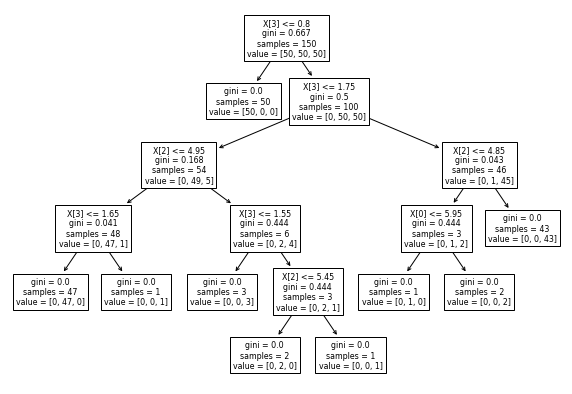

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

data = load_iris()
clf = DecisionTreeClassifier().fit(data.data, data.target)

plt.figure(figsize=(10,7))
plot_tree(clf);

Or we can use tools to plot beautiful decision tree--graphaviz. You have to download the package. See [Download graphviz](https://www.graphviz.org/download/)  

For mac IOS user, try `conda install python-graphviz`

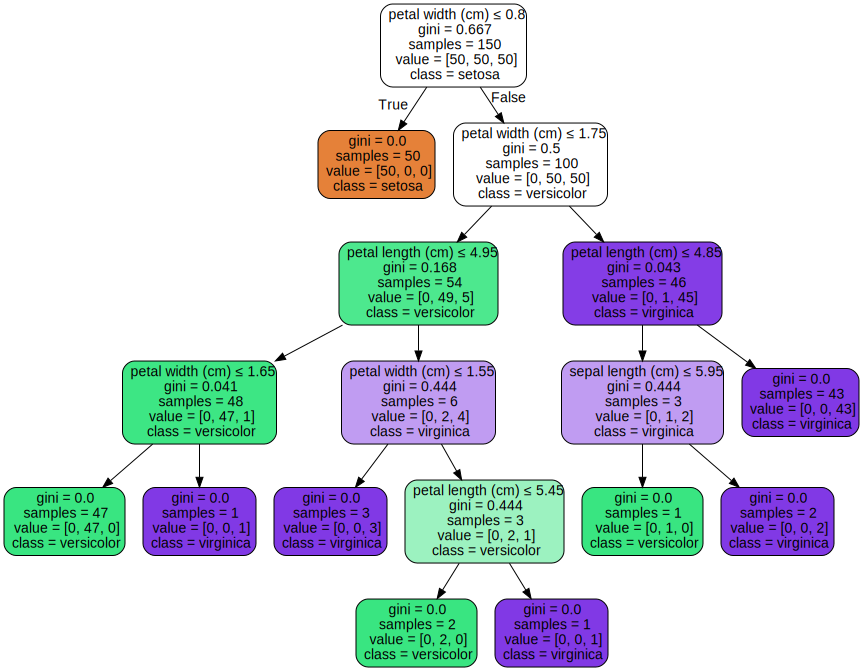

In [2]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None, feature_names=data.feature_names,  
                                class_names=data.target_names,  
                                filled=True, rounded=True,  
                                special_characters=True) 

graph = graphviz.Source(dot_data)  
graph

In [3]:
# This will save the graph as a pdf
dot_data = export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

If we do not control the complexity of decision tree model, it can go as deep as it can and finally separate every data dot in the datasets. This complex model will result in overfitting and longer running time.

There are two common strategies to prevent overfitting:
* Stopping the creation of the tree early (pre-pruning)
* Building the tree but then removing or collapsing nodes that contain little information (post-pruning).

In practice, we can make if by 
* limiting the maximum depth of the tree, 
* limiting the maximum number of leaves, or
* requiring a minimum number of points in a node to keep splitting

In [33]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))
print("Depth: {}, leaves: {}".format(tree.get_depth(), tree.get_n_leaves()))

Accuracy on training set: 1.000
Accuracy on test set: 0.930
Depth: 7, leaves: 16


In [5]:
tree.get_depth(), tree.get_n_leaves()

(7, 16)

The score for training set is 100%, which means that the model is overfitting, with depth of 7 and 16 leaves.

If we don't restrict the depth of a decision tree, the tree can be arbitrarily deep and complex. Threfore, we can adjust some hyperparameters to control model complexity (`max_depth`, `max_leaf_nodes`...)

In [34]:
tree_d4 = DecisionTreeClassifier(max_depth=4, random_state=0).fit(X_train, y_train) 

print("Accuracy on training set: {:.3f}".format(tree_d4.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree_d4.score(X_test, y_test)))
print("Depth: {}, leaves: {}".format(tree_d4.get_depth(), tree_d4.get_n_leaves()))

Accuracy on training set: 0.995
Accuracy on test set: 0.951
Depth: 4, leaves: 12


In [32]:
tree_d4.get_depth(), tree_d4.get_n_leaves()

(4, 12)

Visualize and analyze the tree

In [7]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [39]:
dot_data = export_graphviz(tree_d4, out_file=None, feature_names=cancer.feature_names,  
                                class_names=['malignant','benign'],  
                                filled=True, rounded=True,  
                                special_characters=True) 

graph = graphviz.Source(dot_data)  
graph.render('dt_depth4',format='png', view=True)


'dt_depth4.png'

Instead of looking at the whole tree, we can also analyze the importance of each feature. **Feature importance** rates how important each feature is for decision making. It returns a array of numbers between 0 & 1, in which 0 means "not used at all" while 1 means "perfectly predicts the target".

In [9]:
print("Feature importance:\n {}".format(tree_d4.feature_importances_))

Feature importance:
 [0.         0.         0.         0.         0.         0.
 0.         0.73943775 0.         0.         0.013032   0.
 0.         0.         0.         0.         0.         0.01737208
 0.00684355 0.         0.06019401 0.11783988 0.         0.03522339
 0.01005736 0.         0.         0.         0.         0.        ]


<AxesSubplot:>

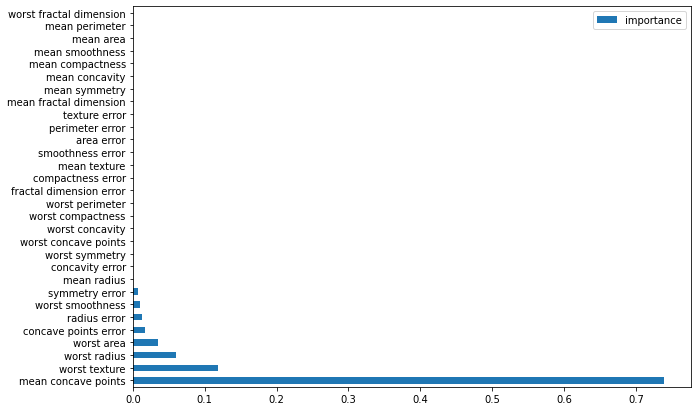

In [10]:
import pandas as pd

feature_importances_df = pd.DataFrame([tree_d4.feature_importances_], columns=cancer.feature_names, index=['importance']).T
feature_importances_df

feature_importances_df.sort_values(by='importance', ascending=False).plot(kind='barh', figsize=(10,7))

We transfer the feature names and their importances into DataFrame and then plot it. We can see that `mean concave points` is the most important features, following by `wost texture`, `worst radius`...

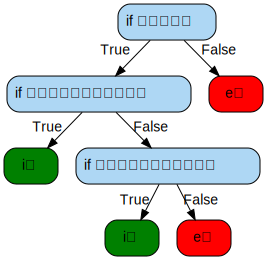

In [61]:
text = """digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ; 
\nedge [fontname=helvetica] ;
\n0 [label=<if 更喜欢独处>, fillcolor="#aed7f4"] ;
\n1 [label=<if 遇到问题倾向于独自解决>,fillcolor="#aed7f4"]; \n2 [label=<e人>,fillcolor="red"]; 
\n3 [label=<i人>,fillcolor="green"];
\n4 [label=<if 在聚会中更愿意独自一人>,fillcolor="#aed7f4"]; 
\n5 [label=<i人>,fillcolor="green"]; 
\n6 [label=<e人>,fillcolor="red"]; 
\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
\n1 -> 3 [labeldistance=2, labelangle=45, headlabel="True"] ;
\n1 -> 4 [labeldistance=2, labelangle=-45, headlabel="False"] ;
\n4 -> 5 [labeldistance=2, labelangle=45, headlabel="True"] ;
\n4 -> 6 [labeldistance=2, labelangle=-45, headlabel="False"] ;
}
"""

graph1 = graphviz.Source(text)  
graph1.render('eg_dt',format='png', view=False)
graph1

# Random Forest

*Ensembles* are methods that combine multiple machine learning models to create more powerful models.

The idea behind random forests is that each tree might do relatively good job of predicting, but will likely overfit on part of the data. If we build many trees, all of which work well and overfit in different ways, we can reduce the amount overfitting by averaging their results.

In [64]:
from sklearn.ensemble import RandomForestClassifier

forest_5 = RandomForestClassifier(n_estimators=5, random_state=42).fit(X_train, y_train)
forest_100 = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)

print("Forest (n_estimators=5)- accuracy on training set: {:.3f}".format(forest_5.score(X_train, y_train)))
print("Forest (n_estimators=100)- accuracy on training set: {:.3f}".format(forest_100.score(X_train, y_train)))
print("Forest (n_estimators=5)- Accuracy on test set: {:.3f}".format(forest_5.score(X_test, y_test)))
print("Forest (n_estimators=100)- Accuracy on test set: {:.3f}".format(forest_100.score(X_test, y_test)))

Forest (n_estimators=5)- accuracy on training set: 0.991
Forest (n_estimators=100)- accuracy on training set: 1.000
Forest (n_estimators=5)- Accuracy on test set: 0.958
Forest (n_estimators=100)- Accuracy on test set: 0.965


<AxesSubplot:>

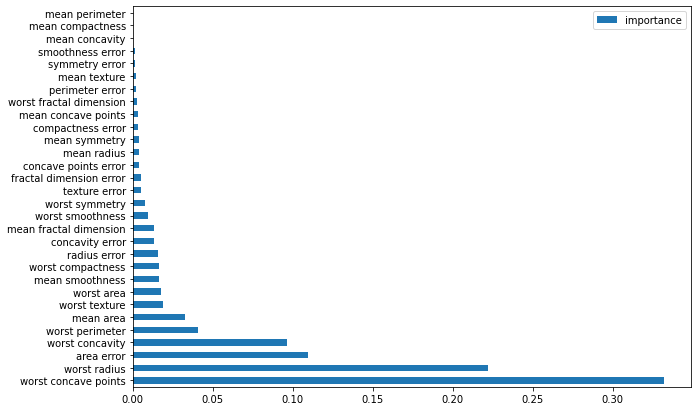

In [65]:
forest_feature_importances_df = pd.DataFrame([forest_5.feature_importances_], columns=cancer.feature_names, index=['importance']).T
forest_feature_importances_df

forest_feature_importances_df.sort_values(by='importance', ascending=False).plot(kind='barh', figsize=(10,7))

